In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from skimpy import clean_columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Load data from csv file and inspect format:

In [2]:
df = pd.read_csv('./RawData.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Clean column names:

In [3]:

cleancolumn_df = clean_columns(df)

Check for duplicates:

In [4]:
df.duplicated().sum()

0

There are no duplicates in the data that needs to be cleaned.

Checking missing values and datatypes:

In [5]:
print(df.info())

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data contains some missing values with the most missing values ay credit_history(50) and self-employed(32). loan_id education, apllicant_income, coapplicant_income, property_area and loand status has 0 missing values. These missing values will need to be filled or dropped depending on eploratory data analysis and visualisation.

Check shape of data:

In [6]:
print(df.shape)

(614, 13)


The data has 614 rows and 13 columns.

Dropping irrelevant columns:

In [7]:
clean_df=cleancolumn_df.drop(columns=['loan_id'], inplace=False)

print(clean_df.head())

print(clean_df.shape)

  gender married dependents     education self_employed  applicant_income  \
0   Male      No          0      Graduate            No              5849   
1   Male     Yes          1      Graduate            No              4583   
2   Male     Yes          0      Graduate           Yes              3000   
3   Male     Yes          0  Not Graduate            No              2583   
4   Male      No          0      Graduate            No              6000   

   coapplicant_income  loan_amount  loan_amount_term  credit_history  \
0                 0.0          NaN             360.0             1.0   
1              1508.0        128.0             360.0             1.0   
2                 0.0         66.0             360.0             1.0   
3              2358.0        120.0             360.0             1.0   
4                 0.0        141.0             360.0             1.0   

  property_area loan_status  
0         Urban           Y  
1         Rural           N  
2         Urba

The loan ID column was dropped and the new clean_df now only contains 12 columns.

Check data discription and view rich data profile:

In [8]:
print(clean_df.describe())

from skimpy import skim
skim(clean_df)

       applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
count        614.000000          614.000000   592.000000         600.00000   
mean        5403.459283         1621.245798   146.412162         342.00000   
std         6109.041673         2926.248369    85.587325          65.12041   
min          150.000000            0.000000     9.000000          12.00000   
25%         2877.500000            0.000000   100.000000         360.00000   
50%         3812.500000         1188.500000   128.000000         360.00000   
75%         5795.000000         2297.250000   168.000000         360.00000   
max        81000.000000        41667.000000   700.000000         480.00000   

       credit_history  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ applicant_income        │   0 │      0 │   5400 │   6100 │  150 │  2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ coapplicant_income      │   0 │      0 │   1600 │   2900 │    0 │     0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ loan_amount             │  22 │   3.58 │    150 │     86 │    9 │   100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ loan_amount_term        │  14 │   2.28 │    340 │     65 │   12 │   360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ credit_history          │  50 │   8.14 │   0.84 │   0.36 │    0 │     1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └─────────────────────────┴─────┴────────┴────────┴────────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ self_employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ property_area                │      0 │          0 │                           1 │                     614 │  │
│ │ loan_status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Investigate data distribution for both numerical and categorical variables:

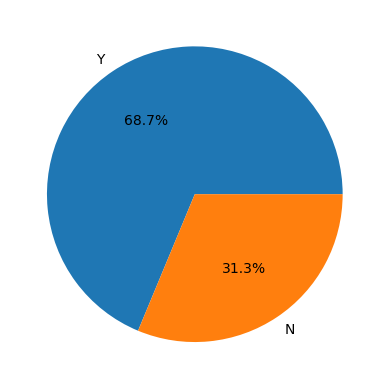

In [9]:


plt.pie(clean_df['loan_status'].value_counts().values, 
        labels=clean_df['loan_status'].value_counts().index, 
        autopct='%1.1f%%') 
plt.show() 

From the pie distribution chart of loan status it can be seen that the data is unbalanced as 68.7% of loans were approved and only 31.3% declined.

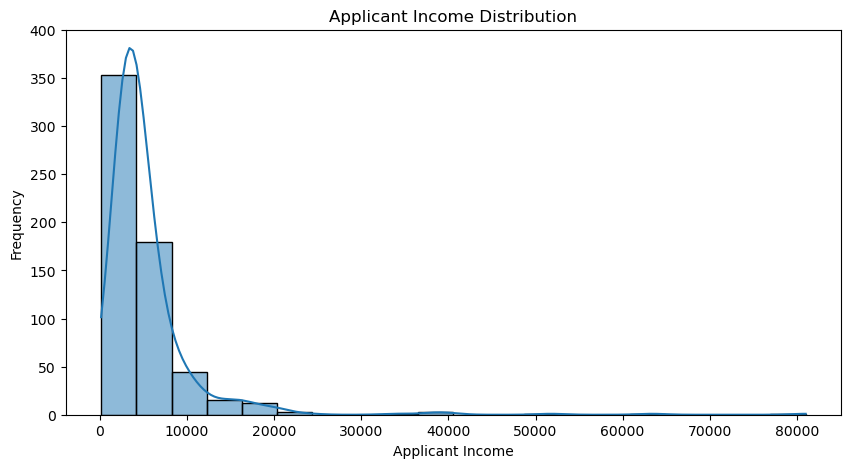

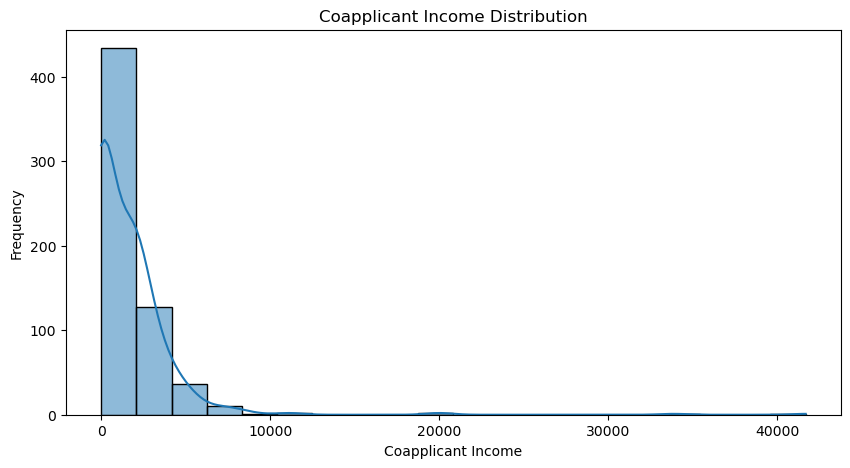

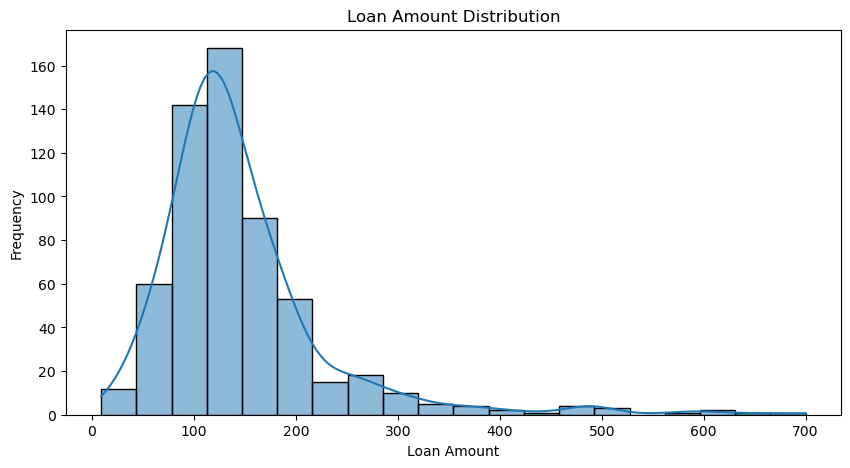

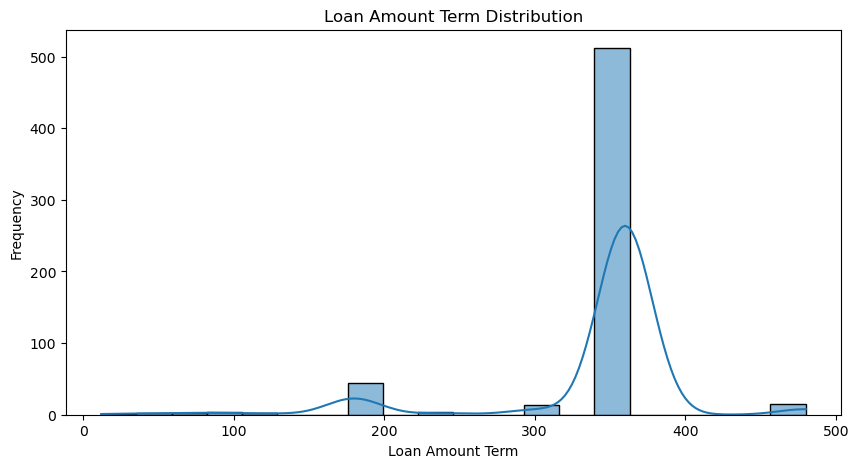

In [10]:
plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='applicant_income', bins=20, kde=True)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='coapplicant_income', bins=20, kde=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Coapplicant Income Distribution')
plt.show()


plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='loan_amount', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.show()

plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='loan_amount_term', bins=20, kde=True)
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.title('Loan Amount Term Distribution')
plt.show()
     



From the histogram distribution plots it can be seen that the numerical data is skew for applicant income, coapplicant income and closer to normal distribution for loan amount and loan amount term.

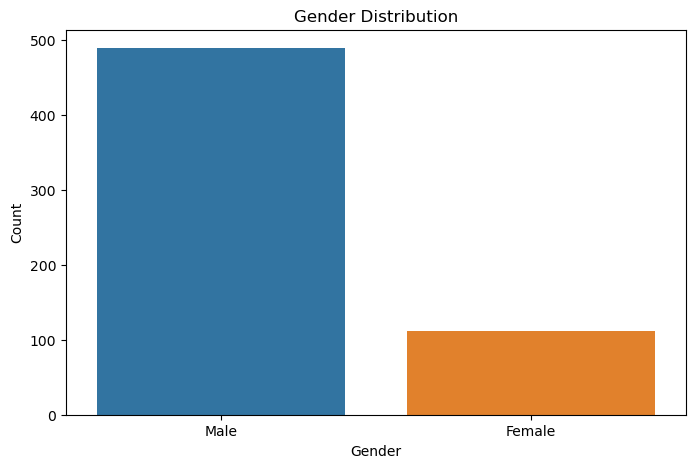

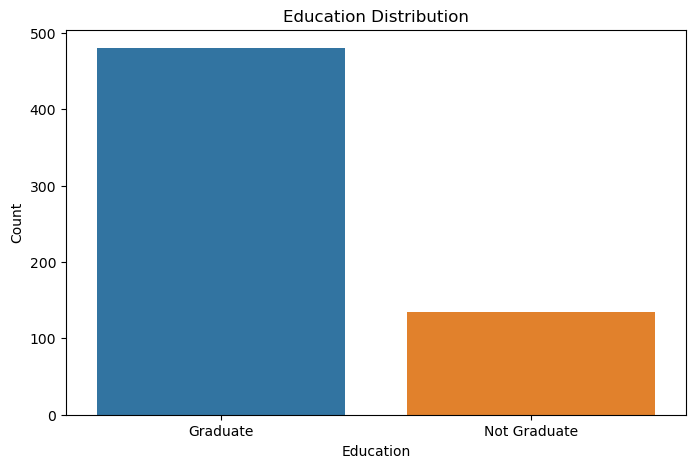

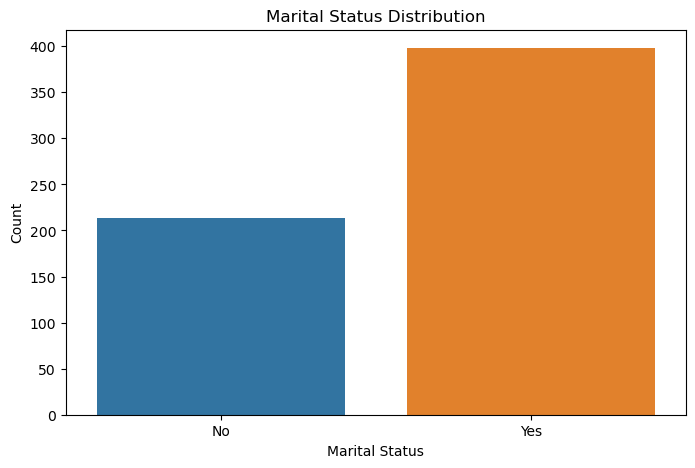

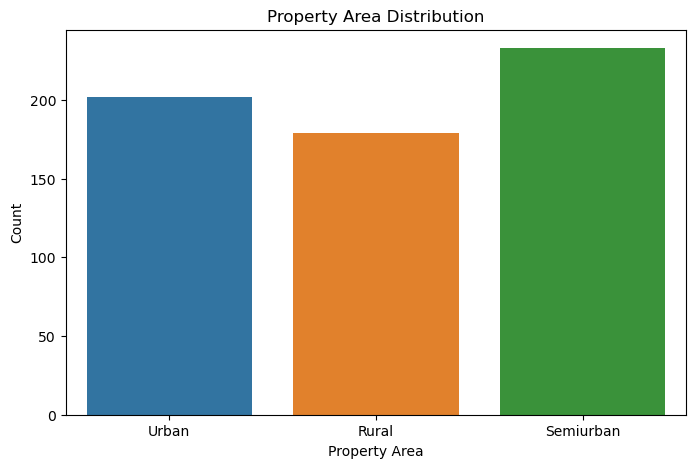

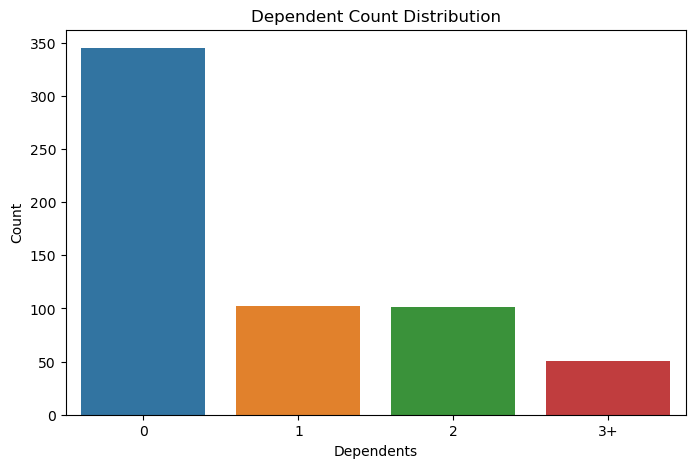

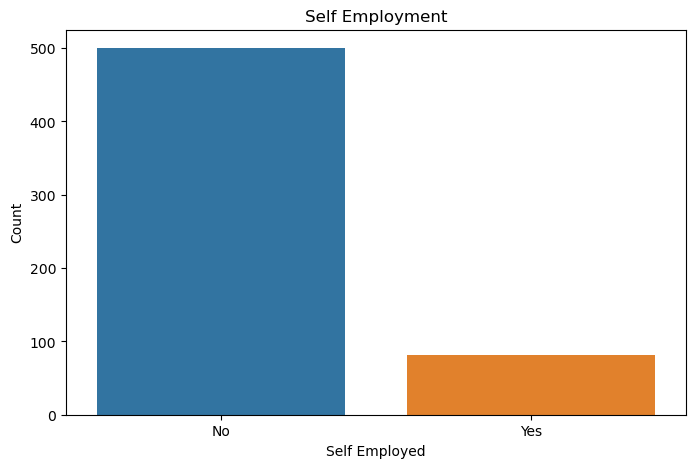

In [11]:
plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='married')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='property_area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Property Area Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependent Count Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='self_employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Self Employment')
plt.show()

Multivariate data visualisation and analysis with pair plots for numerical data:

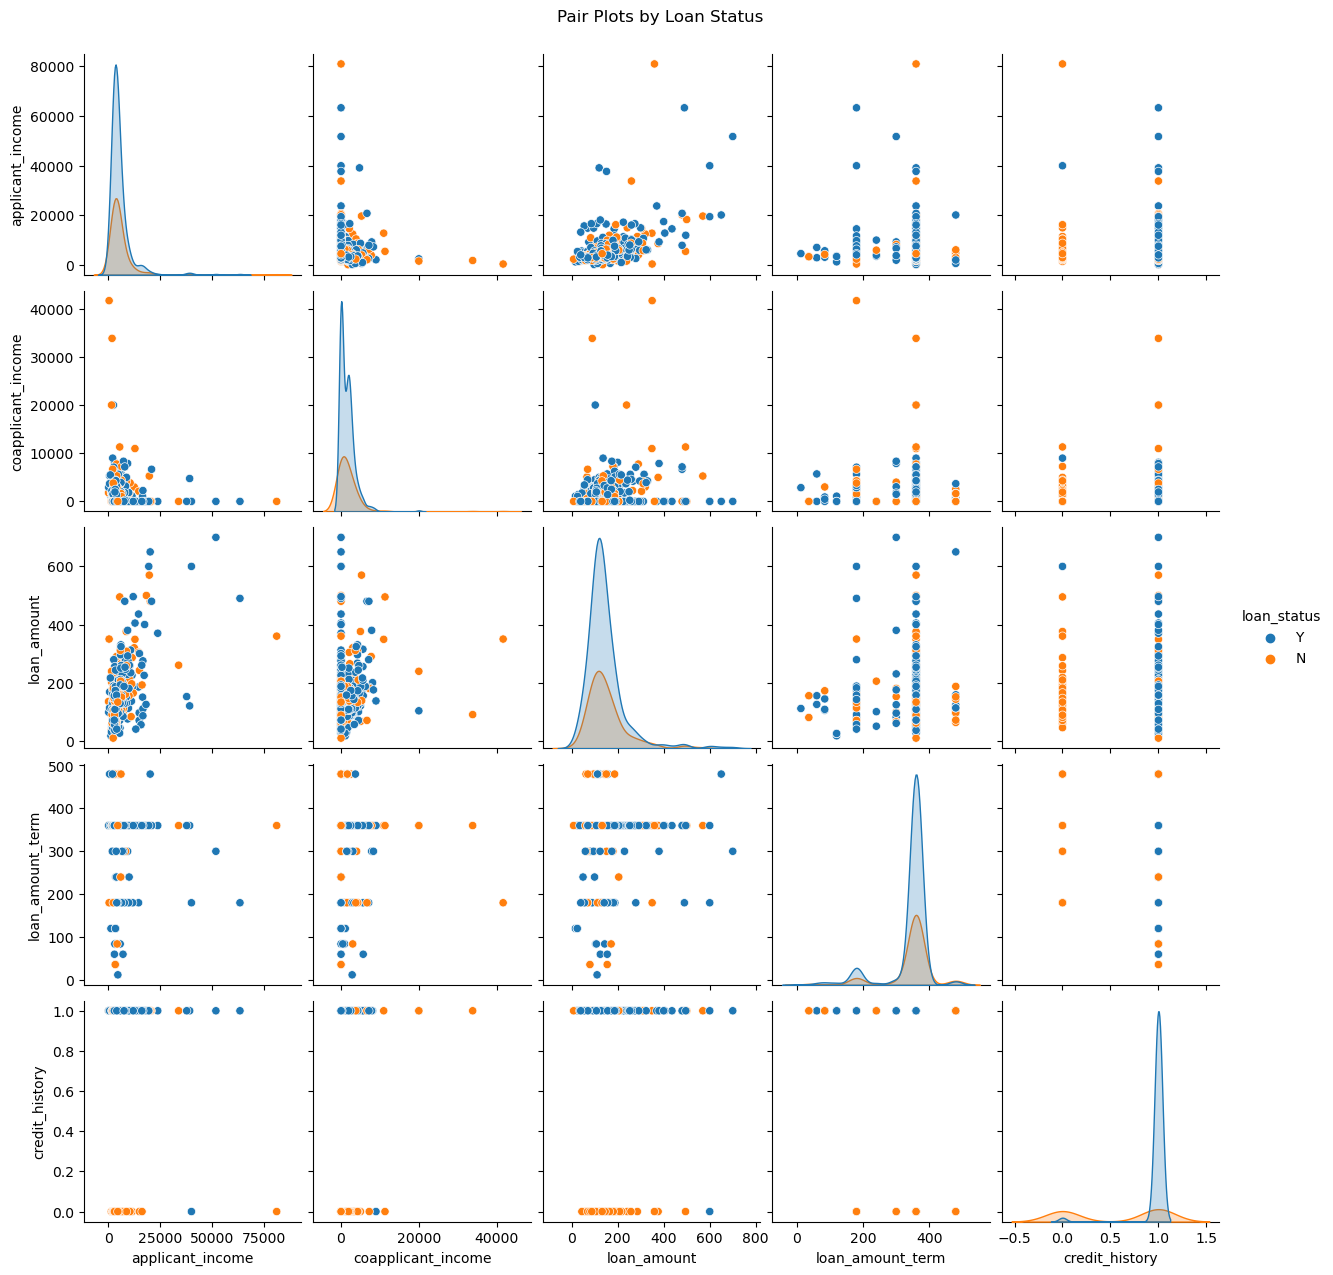

In [12]:
sb.pairplot(clean_df, hue='loan_status')
plt.suptitle('Pair Plots by Loan Status', y=1.02)
plt.show()

Multivariate data visualisation and analysis with with different plots for categorical data:

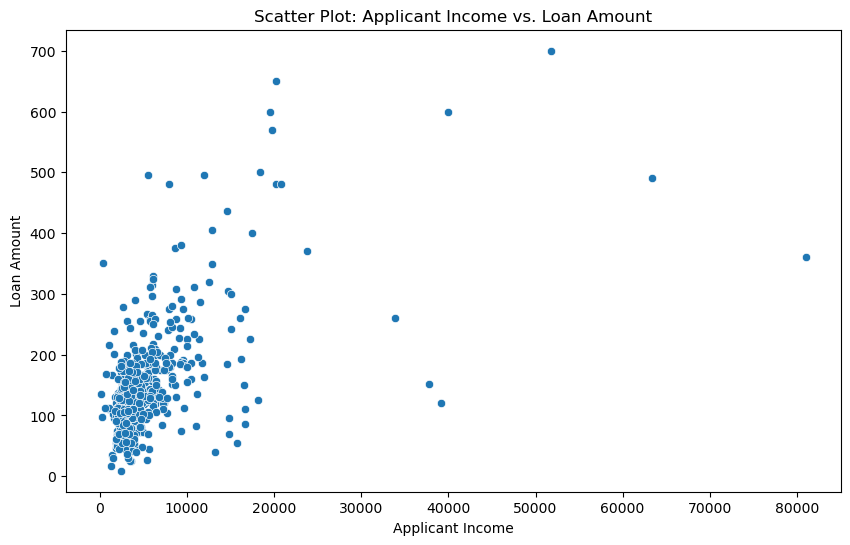

In [13]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=clean_df, x='applicant_income', y='loan_amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()
     

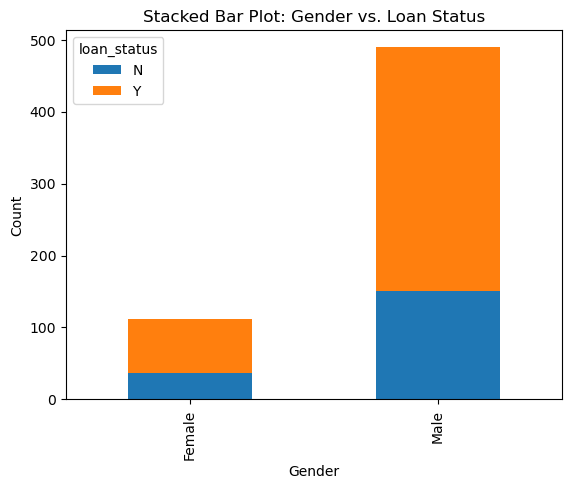

In [14]:
cross_tab = pd.crosstab(clean_df['gender'], clean_df['loan_status'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Gender vs. Loan Status')
plt.show()

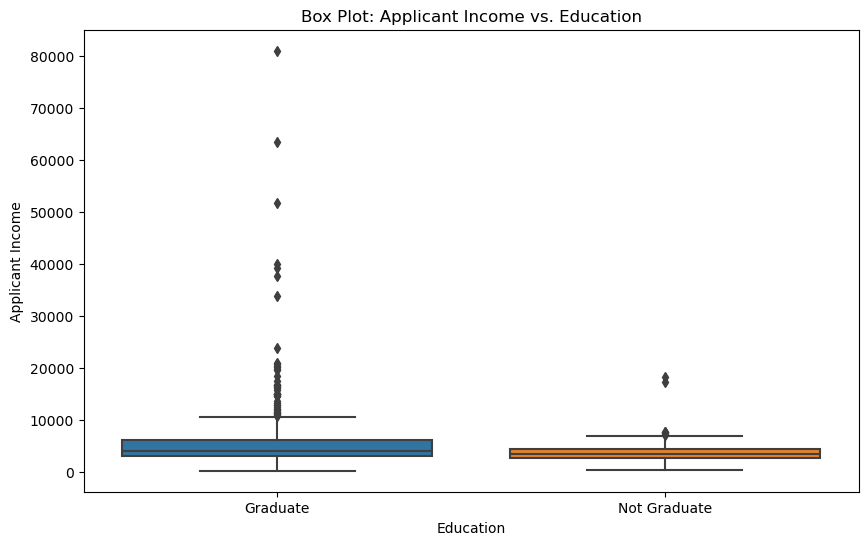

In [15]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=clean_df, x='education', y='applicant_income')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

Using boxplots to check for outliers:

Text(0.5, 0, 'Loan Amount')

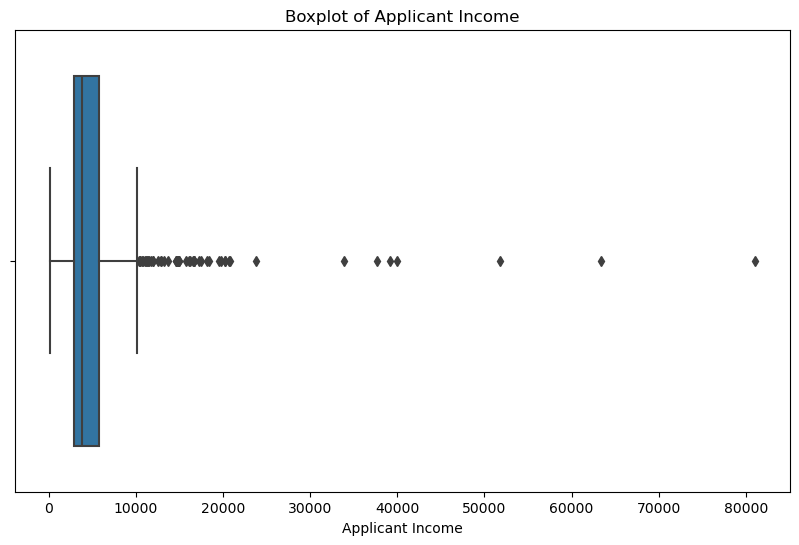

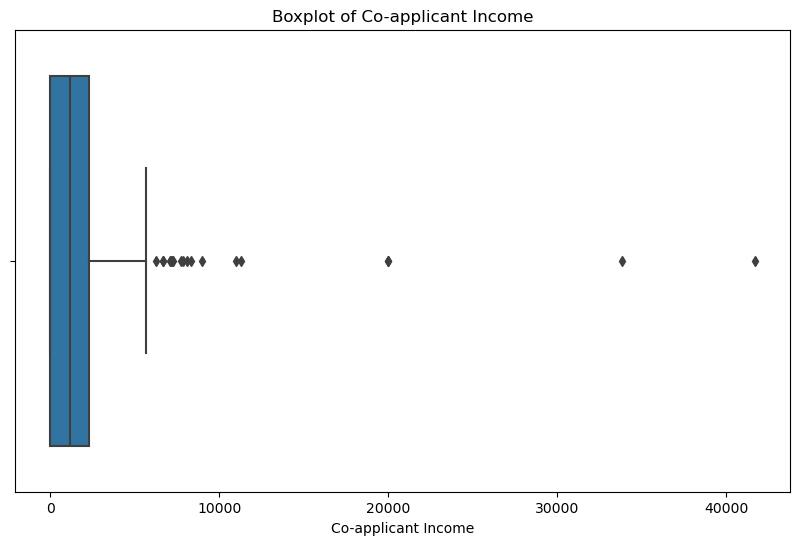

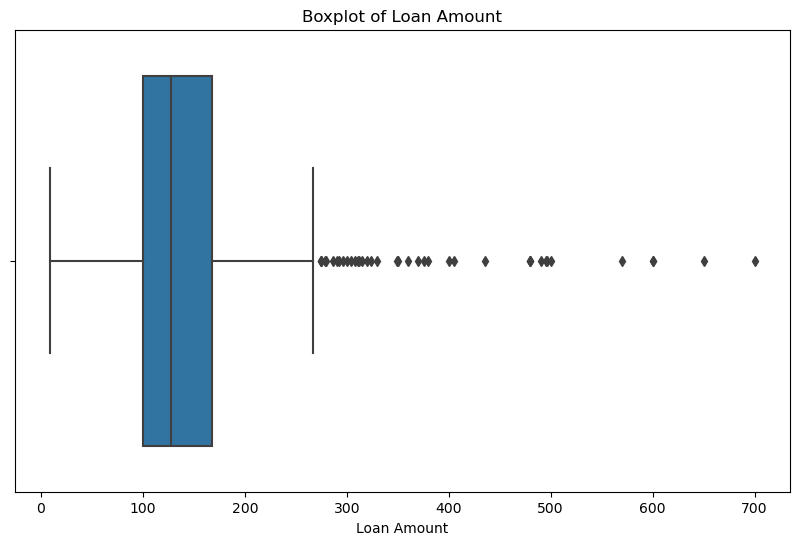

In [16]:
plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['applicant_income'])
plt.title('Boxplot of Applicant Income') 
plt.xlabel('Applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['coapplicant_income'])
plt.title('Boxplot of Co-applicant Income') 
plt.xlabel('Co-applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['loan_amount'])
plt.title('Boxplot of Loan Amount') 
plt.xlabel('Loan Amount')  


From the boxplots outliers are detected in Applicant Income above 20000, Co-Applicant Income aabove 10000 and Loan amount above 400.

Dropping outliers and filling in missing values.

In [17]:
clean_df = clean_df[
    (clean_df['applicant_income'] <= 20000) &
    (clean_df['coapplicant_income'] <= 10000) &
    (clean_df['loan_amount'] <= 400)
]

categorical_columns = ['gender', 'married', 'dependents', 'self_employed']
numerical_columns = ['loan_amount', 'loan_amount_term', 'credit_history']

for col in categorical_columns:
    clean_df[col].fillna(clean_df[col].mode()[0], inplace=True)

for col in numerical_columns:
    clean_df[col].fillna(clean_df[col].median(), inplace=True)

Checking if all missing values are filled and outliers dropped:

Text(0.5, 0, 'Loan Amount')

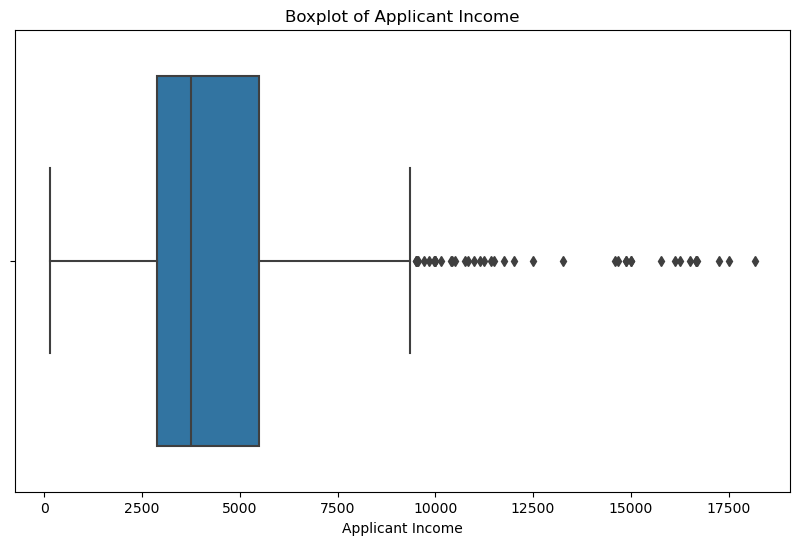

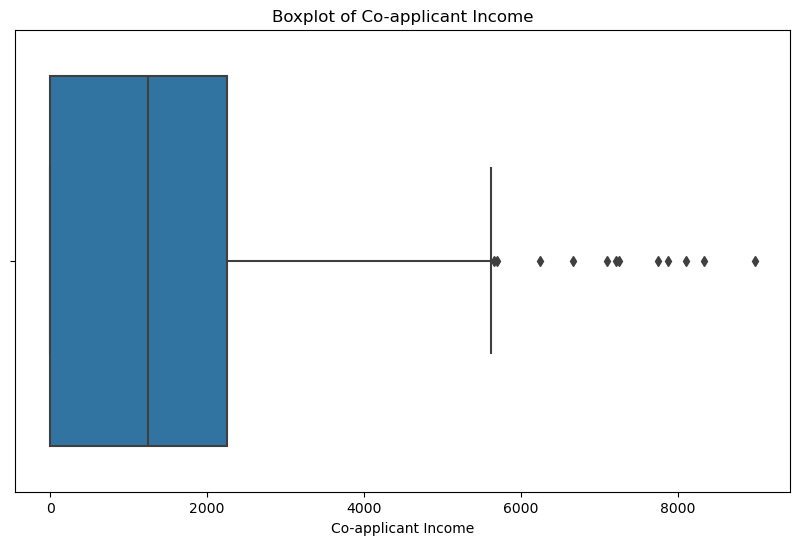

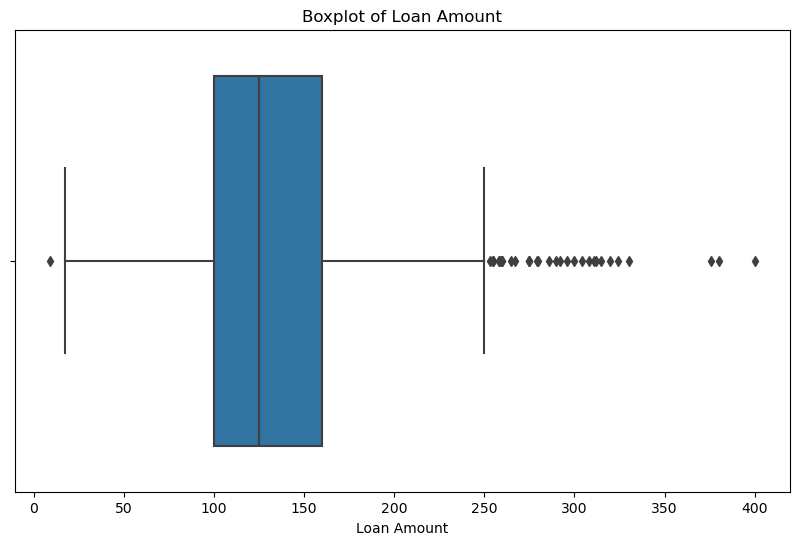

In [18]:
clean_df.isnull().sum()

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['applicant_income'])
plt.title('Boxplot of Applicant Income') 
plt.xlabel('Applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['coapplicant_income'])
plt.title('Boxplot of Co-applicant Income') 
plt.xlabel('Co-applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['loan_amount'])
plt.title('Boxplot of Loan Amount') 
plt.xlabel('Loan Amount')  

Encoding categroical variables:

In [19]:
ohe = OneHotEncoder(sparse=False)
columns_encode = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']
encoded_columns = ohe.fit_transform(clean_df[columns_encode])
new_columns = ohe.get_feature_names_out(columns_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=new_columns)
clean_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
clean_encoded_df = pd.concat([clean_df.drop(columns=columns_encode), encoded_df], axis=1)

clean_encoded_df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128.0,360.0,1.0,N,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3000,0.0,66.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2583,2358.0,120.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,6000,0.0,141.0,360.0,1.0,Y,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5417,4196.0,267.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Feauture Engineering by adding a new column for total income by combining applicant income and co-applicant income.

In [20]:
clean_encoded_df['total_income'] = clean_encoded_df['applicant_income'] + clean_encoded_df['coapplicant_income']

clean_encoded_featured_df= clean_encoded_df.copy()

clean_encoded_featured_df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,total_income
0,4583,1508.0,128.0,360.0,1.0,N,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6091.0
1,3000,0.0,66.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3000.0
2,2583,2358.0,120.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4941.0
3,6000,0.0,141.0,360.0,1.0,Y,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6000.0
4,5417,4196.0,267.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9613.0


Transforming data using log transformation:

In [21]:
skewed_features = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'total_income']
clean_encoded_featured_df[skewed_features] = np.log1p(clean_encoded_featured_df[skewed_features])

clean_encoded_featured_transformed_df = clean_encoded_featured_df.copy()

clean_encoded_featured_transformed_df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,total_income
0,8.430327,7.319202,4.859812,5.888878,1.0,N,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,8.714732
1,8.006701,0.000000,4.204693,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.006701
2,7.857094,7.765993,4.795791,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,8.505525
3,8.699681,0.000000,4.955827,5.888878,1.0,Y,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.699681
4,8.597482,8.342125,5.590987,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9.170976


Saving the cleaned, encoded, feautured and transformed data. As well as saving the cleaned, encoded and trasformed data without the feauture engineering.

In [22]:
clean_encoded_featured_transformed_df.to_csv('train_data.csv', index=False)
